<a href="https://colab.research.google.com/github/AzlinRusnan/Data_Management/blob/main/Bank_Turnover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Turnover Analysis**
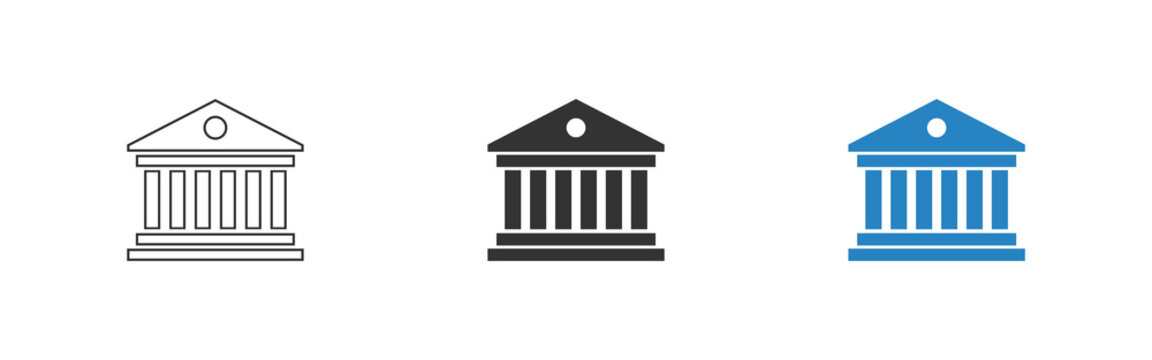

Problem Statement:

Project Overview:

Project Objectives:

##**Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

##**Basic Understanding of the Dataset**
The source of the data is from https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

This dataset contains a compiled collection of bank customer data for analyzing customer turnover.

#### **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Management/Customer-Churn-Records.csv'
df = pd.read_csv(file_path)

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### **Checking the Dimensions of Dataset**

In [21]:
print("Total number of rows presents in the dataset is:",df.shape[0])
print("Total number of columns present in the dataset is:",df.shape[1])

Total number of rows presents in the dataset is: 10000
Total number of columns present in the dataset is: 18


#### **Checking the Columns Names**

In [22]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

##### **Columns Explanation:**


1.   RowNumber: Identification for each row.
2.   CustomerId: Identification for each customer that the Bank has or had.
3.   Surname: It provides information about the family name of each customer.
4.   CreditScore: It is a score assesses the creditworthiness of an individual based on their credit history and financial behavior.
5.   Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6.   Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the turnover prediction.
7.   Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8.   Tenure: It typically represents the number of years or months the customer has been associated with the bank.
9.   Balance: It reflects the amount of money in the customer's bank account at a specific point in time.as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10.  NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
11.  HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12.  IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13.  EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing turnover behavior.
14.  Exited: It indicates whether a customer has churned (1) or not (0) from the bank.
15.  Complain: It refers to customer has complaint or not.
16.  Satisfaction Score: It refers to the score provided by the customer for their complaint.
17.  Card Type: Type of card that customer hold(Diamond,Gold,Platinum,Silver)
18.  Points Earned: It is the point earned by customer for using credit card








#### **Checking Data Information**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

##### **Insight:**
The dataset contains 10,000 records across 18 columns, which include 15 numerical and 3 categorical columns.


#### **Checking the Total Number of Missing Values**

In [24]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


##### **Insight:**
As indicated by the table, there are no missing values; therefore, data imputation is not necessary.

#### **Checking for Duplicate Values**

In [25]:
duplicate_rows = df.duplicated().sum()
print("Insight: There is", duplicate_rows, "duplicate row in the dataset")

Insight: There is 0 duplicate row in the dataset


##**Data Wrangling**

#### **Showing Random Sample of the Data**

In [27]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7741,7742,15634501,Wei,441,France,Male,60,1,140614.15,1,0,1,174381.23,0,0,4,SILVER,227
7058,7059,15671769,Zikoranachidimma,624,France,Female,71,4,170252.05,3,1,1,73679.59,1,1,2,GOLD,858
822,823,15765311,Zhirov,642,Spain,Male,34,8,0.00,1,1,0,72085.10,0,0,3,GOLD,323


##### **Insight:**
RowNumber, CustomerId, and Surname appear irrelevant for predicting customer turnover. Therefore, we can safely remove these three columns from the analysis.

#### **Dropping Irrelevant Columns**

In [28]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [29]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


#### **Renaming Values in Exited Column**

In [30]:
df["Exited"].replace({0:"No",1:"Yes"},inplace=True)

In [31]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,1,3,DIAMOND,377


##### **Insight:**

For this report, since we need to check and compare other variables with the Exited column, we decided to change the Exited column from binary values (0, 1) to (No, Yes) to enhance visibility during the analysis. Additionally, we will retain the four columns with binary numbers as we believe they will be beneficial for later statistical analysis.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

##### **Insight:**
Three columns have been removed, leaving us with 15 columns in total. This includes 11 numerical and 3 categorical columns.

##**Exploratory Data Analysis (EDA)**

####**1. Displaying customer turnover distribution**####




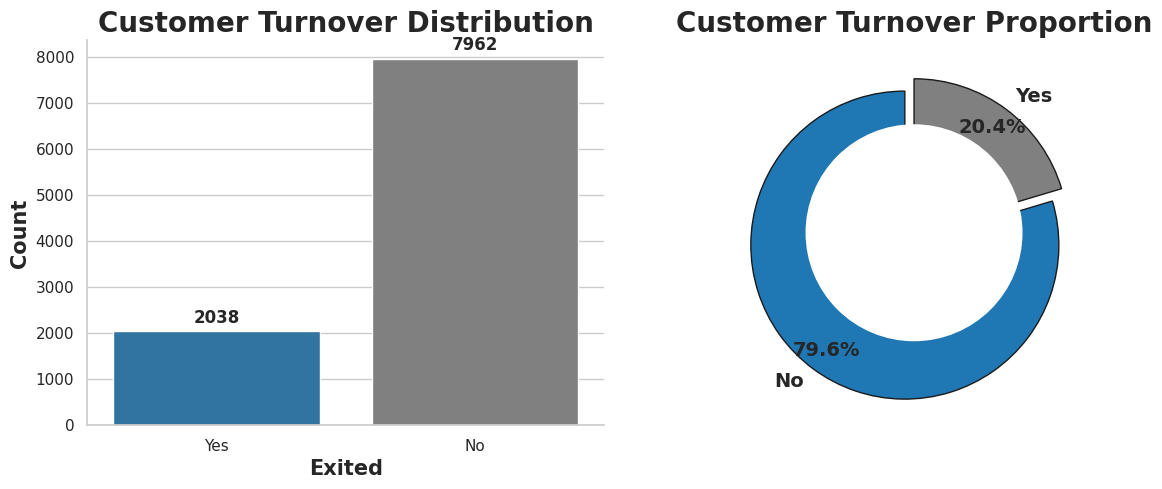

In [58]:
count = df["Exited"].value_counts()
professional_palette = ['#1f77b4', 'gray']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Customer Exited Distribution
sns.countplot(ax=axes[0], x="Exited", data=df, palette=professional_palette)
axes[0].set_title("Customer Turnover Distribution", fontweight="bold", size=20)
axes[0].set_xlabel('Exited', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=15, fontweight='bold')
sns.despine(ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', fontweight="bold", size=12, padding=3)


# Pie chart for Customer Exited Distribution
axes[1].pie(count, labels=['No', 'Yes'], autopct="%1.1f%%", colors=professional_palette,
            textprops={'fontsize': 14, 'fontweight': 'bold'}, startangle=90,
            explode=[0.1, 0], pctdistance=0.85, wedgeprops={"edgecolor": "k", 'linewidth': 1})
axes[1].set_title("Customer Turnover Proportion", fontweight="bold", size=20)
sns.despine(ax=axes[1])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.subplots_adjust(wspace=0.1)
plt.show()

##### **Insight:**



1.   There are huge gap on customer leaving(Yes) and customer stayed(No).
2.   We have to do further analysis on why customer chose to stay or leaving the bank



####**2. Displaying Customer Turnover by Gender**####

In [73]:
professional_palette = ['gray', '#1f77b4']

def countplot(column):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 5))
    ax = sns.countplot(x=column, data=df, hue="Exited", palette=professional_palette)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlabel(column.replace('_', ' ').title(), fontsize=15, fontweight='bold')
    plt.ylabel('Count', fontsize=15, fontweight='bold')
    plt.xticks(rotation=0)
    plt.title(f"Customer Turnover by {column.replace('_', ' ').title()}", fontweight="bold", size=20, pad=20)

    for value in ax.patches:
        if value.get_height() > 0:
            percentage = '{:.1f}%'.format(100 * value.get_height() / len(df[column]))
            x = value.get_x() + value.get_width() / 2
            y = value.get_y() + value.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', fontweight='bold', size=12)

    plt.legend(title='Exited', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

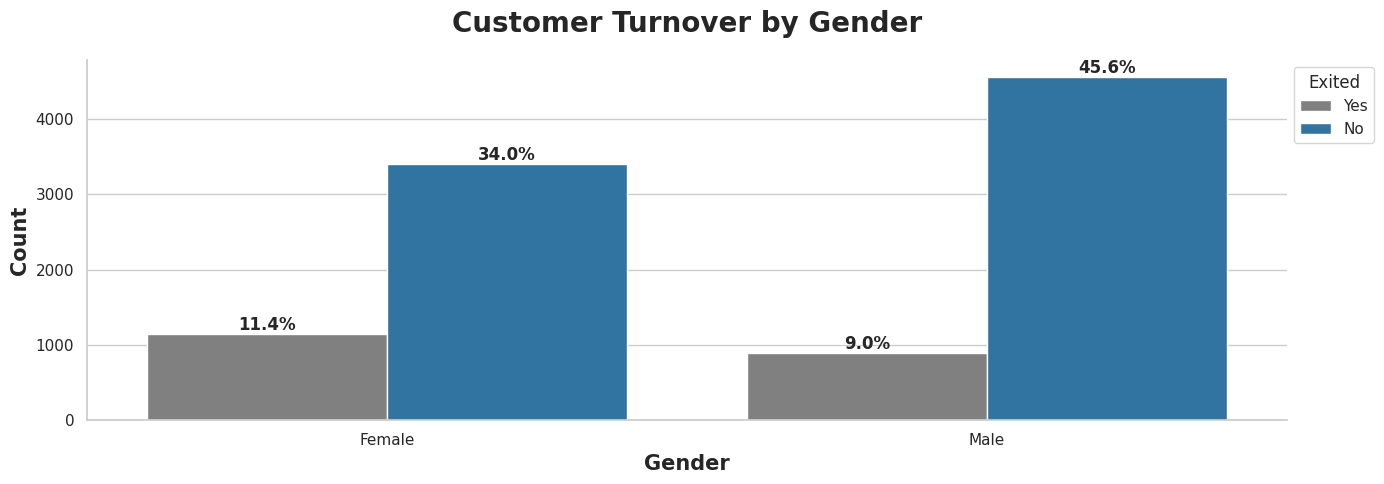

In [74]:
countplot("Gender")

##### **Insight:**

1.   According to the Gender bar graph above, female customer leading the percentage of turnover (11.4%) from the bank compared to male(9.0%).

##### **Recommendation:**


1.   **Customer Research**: Conduct surveys, focus groups, and interviews with female customers to understand their specific concerns, preferences, and needs. This research can reveal insights into why they may be more likely to turn from bank.
2.   **Monitoring and Feedback**: Regularly monitor the effectiveness of these strategies through ongoing feedback mechanisms and adjust them as necessary to ensure they continue to meet the needs of female customers effectively.



####**3. Displaying Customer Turnover by Number of Product**####

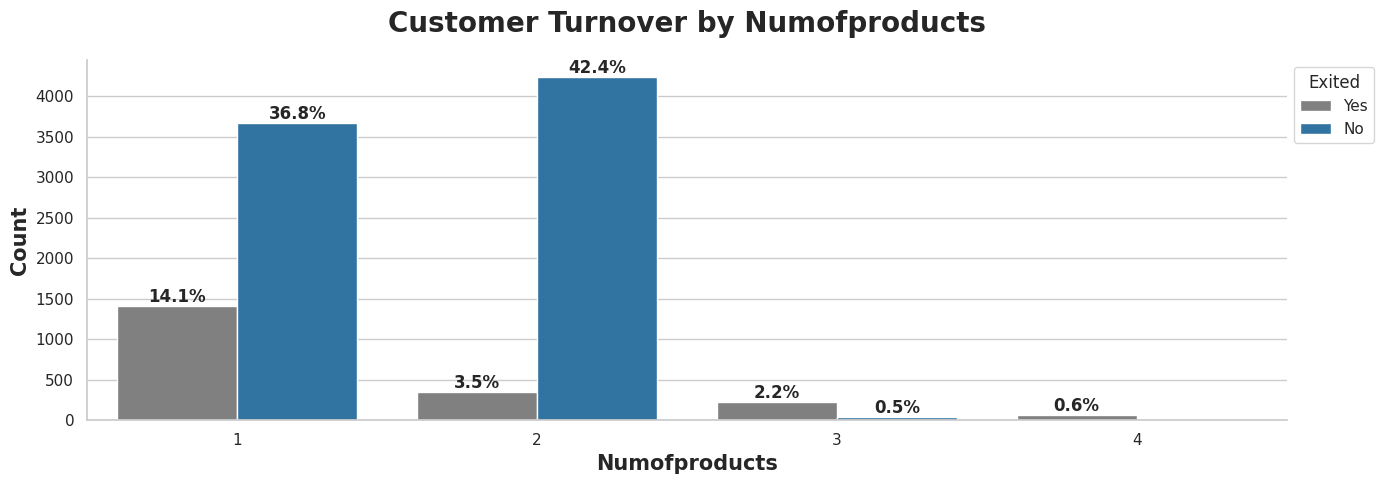

In [75]:
countplot("NumOfProducts")

##### **Note:**
Banks offer a wide range of products and services to meet the financial needs of their customers, ranging from basic banking services to more complex financial solutions. For example here's a list of products from Maybank (https://www.maybank.com/en/products-and-services.page):


1.   Wealth Management
2.   Insurance & Takaful
3.   Consume and Digital Solutions
4.   Etc..

##### **Insight:**

1.   The majority of customers hold either one or two products, while fewer customers have more than two products.
2.   The highest turnover occurs among customers with only one product.

##### **Recommendation:**


1.   **Customer Research**: Conduct surveys, focus groups, and interviews with female customers to understand their specific concerns, preferences, and needs. This research can reveal insights into why they may be more likely to turn from bank.
2.   **Monitoring and Feedback**: Regularly monitor the effectiveness of these strategies through ongoing feedback mechanisms and adjust them as necessary to ensure they continue to meet the needs of female customers effectively.